# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# import matplotlib.pyplot as plt

from sklearn import cluster
from sklearn import mixture
from sklearn import preprocessing
from collections import Counter
# from mpl_toolkits.mplot3d import Axes3D

# Data Preprocess
### Reading data

In [2]:
def read_data(folder, step):
    file_path = "../data/50mph/" + str(folder) + "/" + str(folder) + str(step)

    data = pd.read_csv(file_path)
    
    return data
    

### Utility Functions

In [3]:
def match_partnum(df1, df2):
    diff1 = list(set(df1["part_num"]) - set(df2["part_num"]))
    diff2 = list(set(df2["part_num"]) - set(df1["part_num"]))
    
    del_row_idx1 = []
    del_row_idx2 = []
    for i in range(len(diff1)):
        del_row_idx1.append(int(np.where(df1["part_num"] == diff1[i])[0]))
    df1 = df1.drop(del_row_idx1, axis=0)

    for i in range(len(diff2)):
        del_row_idx2.append(int(np.where(df2["part_num"] == diff2[i])[0]))
    df2 = df2.drop(del_row_idx2, axis=0)

    # set dataframe index to part_num, otherwise there is a mismatch of index between 
    # df1 and df2 since index won't be reassigned when droping rows. Such mismatch leads
    # NaN values when calculating particle movement
    df1 = df1.set_index(pd.Index(df1["part_num"]))
    df2 = df2.set_index(pd.Index(df2["part_num"]))
    
    return df1, df2

def util_winsorization(df):
    p = 0.95
    quantile_value = np.quantile(df, p)
    
    df = df.apply(lambda x: x if x < quantile_value else quantile_value)
    
    return df

def preprocess(df):
    # change movement into absolute values
    df.iloc[:,4:7] = np.abs(df.iloc[:,4:7])
    
    # take natural logarithm for movement columns
    min_value = 1e-5
    df.iloc[:,4:7] = np.log(df.iloc[:,4:7] + min_value)
    
    # winsorization is not suitable here, it actually makes the clustering results worse
#     df.iloc[:,4:7] = df.iloc[:,4:7].apply(util_winsorization, axis = 0)
    
    # data standardization 
    tmp = pd.DataFrame(preprocessing.scale(df.iloc[:,4:7]))
    tmp = tmp.set_index(pd.Index(df["part_num"]))
    tmp.columns = df.columns[4:7]
    df.iloc[:,4:7] = tmp
    
    return df

def cross_section(df, x_range, y_range, z_range):
    

# Clustering
### Center Binding

In [4]:
# set folder name and file name
folder_init, folder_final = "cb_d9out", "cb_d16out"
step_init, step_final = "_Step1.csv", "_Step303.csv"

# read initial state file and final state file
init_state = read_data(folder_init, step_init)
final_state = read_data(folder_final, step_final)

# remove particles not exist in both files 
init_state, final_state = match_partnum(init_state, final_state)

# calculate particle movement in x, y, z directions
part_movement = []
part_movement = final_state.iloc[:,2:5] - init_state.iloc[:,2:5]

# finalize particle movement dataframe
part_movement = pd.concat([final_state["part_num"].astype(int), final_state.iloc[:,2:5],
                           part_movement], axis=1)
part_movement.index.name = ""
part_movement.columns = ['part_num', 'x', 'y', 'z', 'movement_x', 'movement_y', 'movement_z']

# preprocess dataframe
# print(part_movement.iloc[:,:7])
part_movement = preprocess(part_movement)
# part_movement


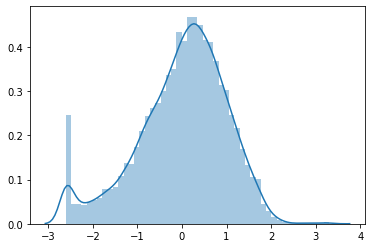

In [24]:
%matplotlib inline

# get a intuition of data distributions
sns.distplot(pd.DataFrame(part_movement["movement_z"]))


In [6]:
import visualization_util as vs

# unsuperised kmeans clustering
kmeans = cluster.KMeans(n_clusters = 4, n_init = 10, random_state = 0).fit(part_movement.iloc[:,4:7])
print(Counter(kmeans.labels_))
label = pd.DataFrame({'part_num':part_movement["part_num"],'label':kmeans.labels_})
label.to_csv('labels_movement_cb.csv',header=True, index=False)


Counter({0: 4909, 1: 3539, 3: 1629, 2: 1349})


In [7]:
import visualization_util as vs

vs.plot('labels_movement_cb.csv', 'CenterBinding.v3d','library.vlb')

Terminate program? 


SystemExit: 

/Users/bin/anaconda3/envs/research/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### Full Support

In [13]:
# set folder name and file name
folder_init, folder_final = "fs_d7out", "fs_d14out"
step_init, step_final = "_Step1.csv", "_Step303.csv"

# read initial state file and final state file
init_state = read_data(folder_init, step_init)
final_state = read_data(folder_final, step_final)

# remove particles not exist in both files 
init_state, final_state = match_partnum(init_state, final_state)

# print(list(set(init_state["part_num"]) - set(final_state["part_num"])))
# calculate particle movement in x, y, z directions
part_movement = []
part_movement = final_state.iloc[:,2:5] - init_state.iloc[:,2:5]
# finalize particle movement dataframe

part_movement = pd.concat([final_state["part_num"].astype(int), final_state.iloc[:,2:5],
                           part_movement], axis=1)
part_movement.index.name = ""
part_movement.columns = ['part_num', 'x', 'y', 'z', 'movement_x', 'movement_y', 'movement_z']

# preprocess dataframe
# print(part_movement.iloc[:,:7])
part_movement = preprocess(part_movement)
# part_movement


In [14]:
# unsuperised kmeans clustering
kmeans = cluster.KMeans(n_clusters = 5, n_init = 10, random_state = 0).fit(part_movement.iloc[:,4:7])
print(Counter(kmeans.labels_))
label = pd.DataFrame({'part_num':part_movement["part_num"],'label':kmeans.labels_})
label.to_csv('labels_movement_fs.csv',header=True, index=False)


Counter({0: 3740, 2: 2472, 4: 1633, 1: 1626, 3: 1148})


In [10]:
vs.plot('labels_movement_fs.csv', 'FullSup.v3d','library.vlb')

Terminate program? 


SystemExit: 

/Users/bin/anaconda3/envs/research/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### Lack of Center Support

In [16]:
# set folder name and file name
folder_init, folder_final = "locs_d9out", "locs_d16out"
step_init, step_final = "_Step1.csv", "_Step303.csv"

# read initial state file and final state file
init_state = read_data(folder_init, step_init)
final_state = read_data(folder_final, step_final)

# remove particles not exist in both files 
init_state, final_state = match_partnum(init_state, final_state)

# print(list(set(init_state["part_num"]) - set(final_state["part_num"])))
# calculate particle movement in x, y, z directions
part_movement = []
part_movement = final_state.iloc[:,2:5] - init_state.iloc[:,2:5]
# finalize particle movement dataframe

part_movement = pd.concat([final_state["part_num"].astype(int), final_state.iloc[:,2:5],
                           part_movement], axis=1)
part_movement.index.name = ""
part_movement.columns = ['part_num', 'x', 'y', 'z', 'movement_x', 'movement_y', 'movement_z']

# preprocess dataframe
# print(part_movement.iloc[:,:7])
part_movement = preprocess(part_movement)
# part_movement


In [17]:
# unsuperised kmeans clustering
kmeans = cluster.KMeans(n_clusters = 5, n_init = 10, random_state = 0).fit(part_movement.iloc[:,4:7])
print(Counter(kmeans.labels_))
label = pd.DataFrame({'part_num':part_movement["part_num"],'label':kmeans.labels_})
label.to_csv('labels_movement_locs.csv',header=True, index=False)


Counter({1: 4352, 2: 2094, 0: 1842, 4: 1679, 3: 1438})


In [22]:
vs.plot('labels_movement_locs.csv', 'LackofCenterSup.v3d','library.vlb')

Terminate program? 


SystemExit: 

/Users/bin/anaconda3/envs/research/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### Lack of Rail Seat Support

In [19]:
# set folder name and file name
folder_init, folder_final = "lorss_d13out", "lorss_d20out"
step_init, step_final = "_Step1.csv", "_Step303.csv"

# read initial state file and final state file
init_state = read_data(folder_init, step_init)
final_state = read_data(folder_final, step_final)

# remove particles not exist in both files 
init_state, final_state = match_partnum(init_state, final_state)

# print(list(set(init_state["part_num"]) - set(final_state["part_num"])))
# calculate particle movement in x, y, z directions
part_movement = []
part_movement = final_state.iloc[:,2:5] - init_state.iloc[:,2:5]
# finalize particle movement dataframe

part_movement = pd.concat([final_state["part_num"].astype(int), final_state.iloc[:,2:5],
                           part_movement], axis=1)
part_movement.index.name = ""
part_movement.columns = ['part_num', 'x', 'y', 'z', 'movement_x', 'movement_y', 'movement_z']

# preprocess dataframe
# print(part_movement.iloc[:,:7])
part_movement = preprocess(part_movement)
# part_movement


In [20]:
# unsuperised kmeans clustering
kmeans = cluster.KMeans(n_clusters = 5, n_init = 10, random_state = 0).fit(part_movement.iloc[:,4:7])
print(Counter(kmeans.labels_))
label = pd.DataFrame({'part_num':part_movement["part_num"],'label':kmeans.labels_})
label.to_csv('labels_movement_lorss.csv',header=True, index=False)


Counter({4: 3883, 2: 2787, 1: 2191, 0: 1673, 3: 1243})


In [21]:
vs.plot('labels_movement_fs.csv', 'LackofRailSeatSup.v3d','library.vlb')

Terminate program? 


SystemExit: 

/Users/bin/anaconda3/envs/research/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
